In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import zipfile

In [2]:
#load data from zip file
zf = zipfile.ZipFile('A_Z Handwritten Data.zip') 
df = pd.read_csv(zf.open('A_Z Handwritten Data.csv')).astype('float32')
print(df.head(5))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


In [3]:
#split the data into images and their labels
X = df.drop('0',axis=1)
y = df['0']
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)
#reshape the data to be displayed as image
train_x = np.reshape(train_x.values, (train_x.shape[0],28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0],28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


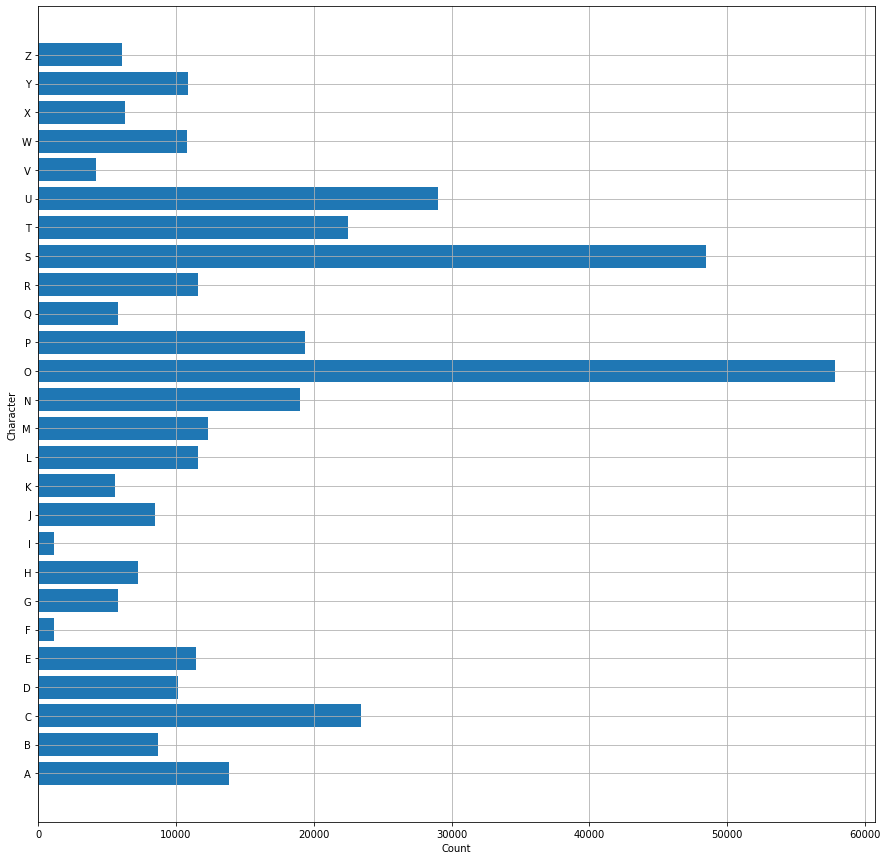

In [4]:
#used to map integers to their corressponding characters
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

#plot the count of characters in dataset
y_int = np.int0(y)
count = np.zeros(26,dtype = 'int')

for i in y_int:
    count[i] += 1

characters = []
for i in word_dict.values():
    characters.append(i)

fig,ax = plt.subplots(1,1, figsize=(15,15))
ax.barh(characters,count)
plt.xlabel("Count")
plt.ylabel("Character")
plt.grid()
plt.show()

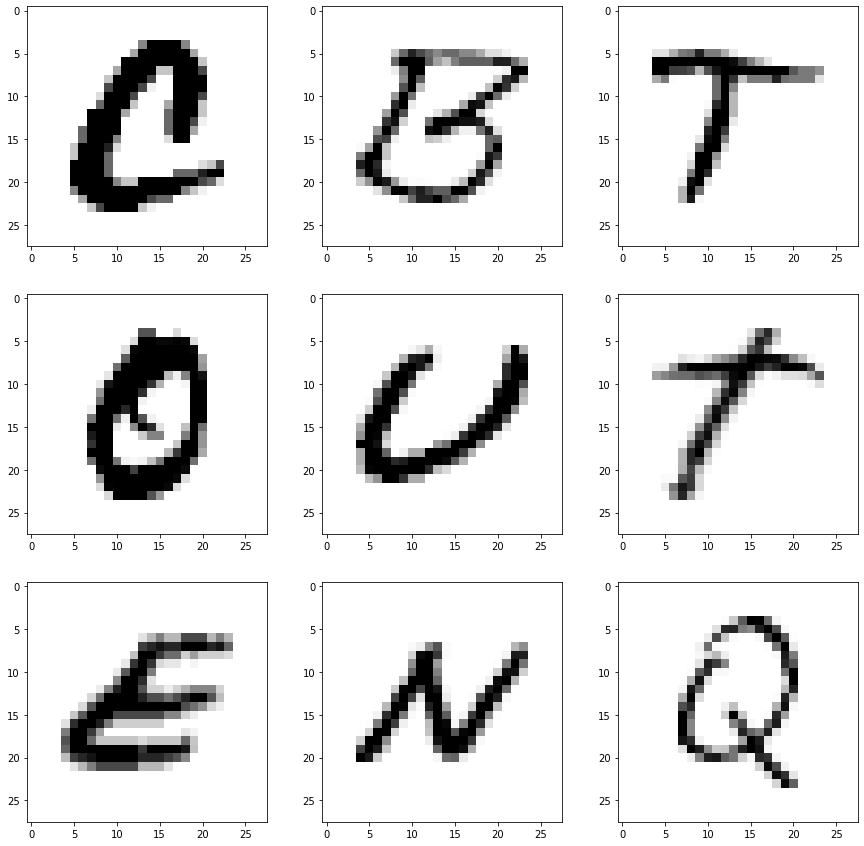

In [5]:
#shuffling the data
shuff = shuffle(train_x[:100])

fig,ax = plt.subplots(3,3, figsize=(15,15))
axes = ax.flatten()

#plot images after suffle
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [6]:
#reshape training and test sets to put in model
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [7]:
#convert the labels to categorical values
train_yCat = to_categorical(train_y,num_classes=26,dtype='int')
test_yCat = to_categorical(test_y,num_classes=26,dtype='int')
print(train_yCat.shape)
print(test_yCat.shape)

(297960, 26)
(74490, 26)


In [8]:
#creating cnn model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [9]:
#complie and fitting
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_yCat, epochs=1,  validation_data = (test_x,test_yCat))

9312/9312 [==============================] - 198s 21ms/step - loss: 0.1638 - accuracy: 0.9556 - val_loss: 0.1043 - val_accuracy: 0.9718


In [10]:
#get summary
model.summary()
#save model to deploy it on website
model.save(r'model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [11]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9718217253684998]
The training accuracy is : [0.9555947184562683]
The validation loss is : [0.10427318513393402]
The training loss is : [0.16382038593292236]


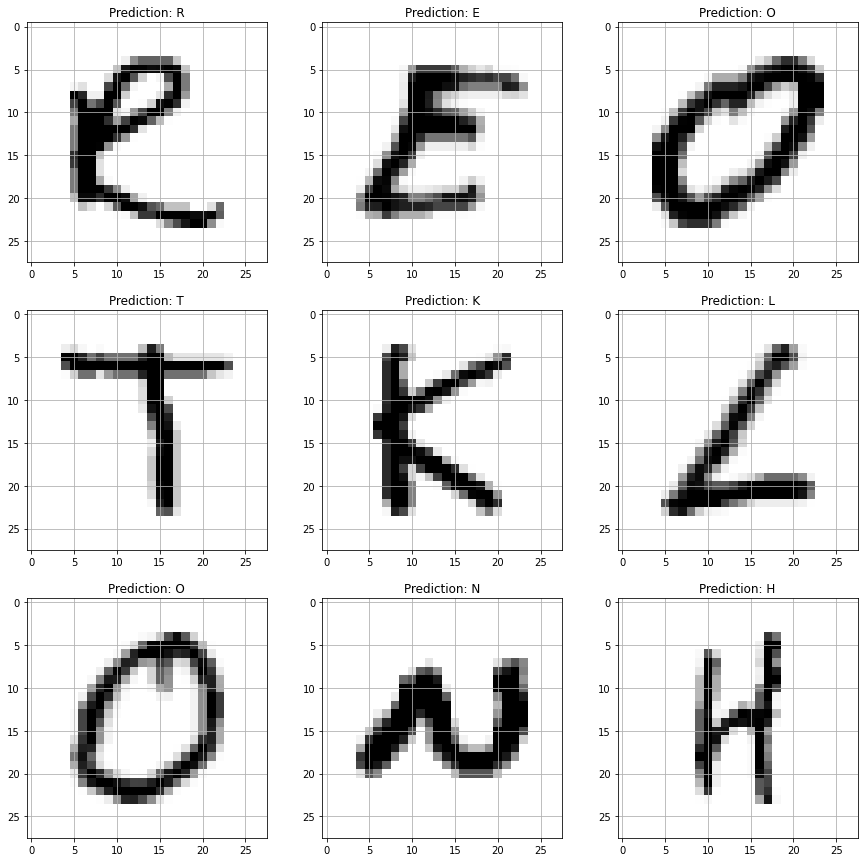

In [12]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_x[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yCat[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()